# 2023 환경 데이터분석 공모전

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False # 한글 깨짐 방지
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
path = 'C:/datasets'
os.chdir(path)

In [3]:
df = pd.read_csv("life_all.csv")

In [4]:
# 행/열 전환
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996 년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997 년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998 년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999 년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8


In [5]:
# 열 이름 변경
df.columns = df.iloc[0, :]

# 필요없는 행 지우기
df.drop(labels='구분1', axis=0, inplace=True)

# '년' 빼버리기
df.idx = list(df.index)
year = []
for i in df.idx:
    year.append(i[0:4])

# datetime을 index로 변경!
year = pd.to_datetime(year)
df.index = year
df.tail()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2017-01-01,162.7,1129.9,331.2,271.0,119.8,285.7,144.4,389.5,797.2,23.3,96.4,139.3,189.9,213.7,62.7,230.2,173.1
2018-01-01,196.3,1301.5,335.0,318.6,135.3,301.1,164.5,340.3,741.7,37.9,100.4,177.5,201.1,252.8,47.4,286.4,176.3
2019-01-01,264.7,1572.0,409.1,320.6,129.6,349.7,202.3,508.3,1111.1,33.2,128.8,254.6,231.8,217.4,81.6,246.9,243.6
2020-01-01,104507.8,674379.0,160810.0,146123.6,51582.7,132795.4,84849.5,288889.6,593849.8,16540.3,59688.1,115752.4,97958.0,82541.3,46426.4,110946.0,97861.1
2021-01-01,114571.8,789086.5,181060.0,147046.8,73882.0,108613.4,75176.4,195057.2,558579.8,23216.2,45469.6,147726.8,85923.3,86318.3,48265.3,127683.7,102501.2


In [6]:
# 2020 ~ 2021 오류 수정 → 365로 나눠주기
p_2020 = np.array(df.loc['2020-01-01', :])
p_2020 = list(p_2020 / 365)
df.loc['2020-01-01', :] = np.round(p_2020, 1)

p_2021 = np.array(df.loc['2021-01-01', :])
p_2021 = list(p_2021 / 365)
df.loc['2021-01-01', :] = np.round(p_2021, 1)

In [7]:
# 잘 됐나 확인!
df.tail()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2017-01-01,162.7,1129.9,331.2,271.0,119.8,285.7,144.4,389.5,797.2,23.3,96.4,139.3,189.9,213.7,62.7,230.2,173.1
2018-01-01,196.3,1301.5,335.0,318.6,135.3,301.1,164.5,340.3,741.7,37.9,100.4,177.5,201.1,252.8,47.4,286.4,176.3
2019-01-01,264.7,1572.0,409.1,320.6,129.6,349.7,202.3,508.3,1111.1,33.2,128.8,254.6,231.8,217.4,81.6,246.9,243.6
2020-01-01,286.3,1847.6,440.6,400.3,141.3,363.8,232.5,791.5,1627.0,45.3,163.5,317.1,268.4,226.1,127.2,304.0,268.1
2021-01-01,313.9,2161.9,496.1,402.9,202.4,297.6,206.0,534.4,1530.4,63.6,124.6,404.7,235.4,236.5,132.2,349.8,280.8


---

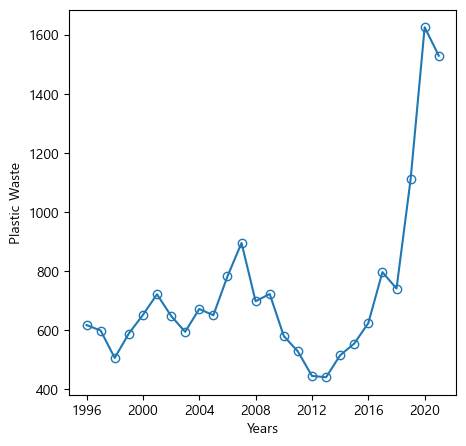

In [8]:
# plot(서울)

fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.plot(df['서울'], marker='o', markerfacecolor='none')

plt.ylabel('Plastic Waste')
plt.xlabel('Years')
plt.show()

확실히 **2020년 전후**로 눈에 띄게 증가했음

---

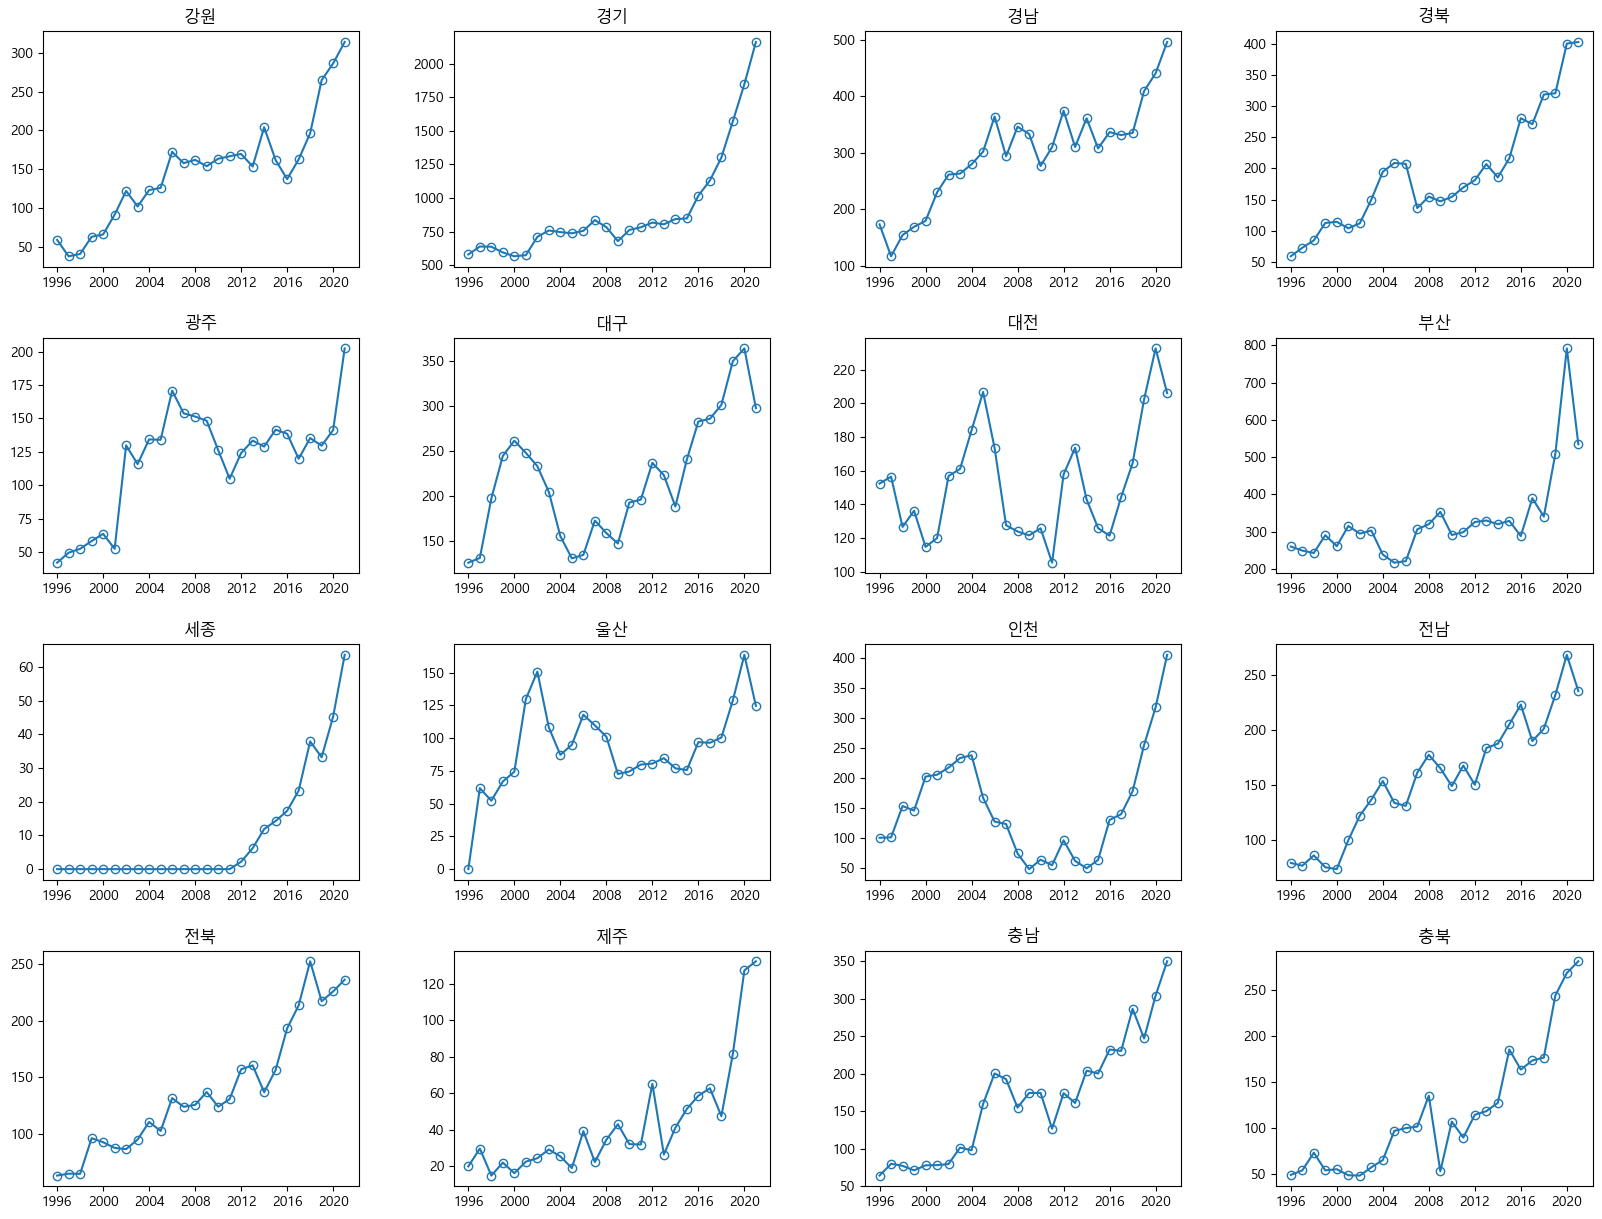

In [9]:
# 서울 이외의 지역들 다른 데이터로 만들기
df_local = df.drop(columns=['서울'], axis=1)

# plot(서울 외)
f, axes = plt.subplots(4, 4)
f.set_size_inches((20, 15)) # 격자 크기 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3) # 격자 여백 설정

for i in range(4):
    for j in range(4):
        axes[i, j].set_title("%s" %df_local.columns[4*i+j])
        axes[i, j].plot(df_local.iloc[:, 4*i+j], marker='o', markerfacecolor='none')

전반적으로 증가하는 느낌,,?

로그변환 및 Box-Cox 변환 진행 예정 → 정상성 확보 필요

---